In [2]:
# Import all the libraries that we shall be using
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
import plotly.express as px 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve,plot_precision_recall_curve,plot_confusion_matrix
data=pd.read_csv('Brain_GSE15824.csv')

In [3]:
data.columns
print(np.shape(data))
data.iloc[:,1]
print(data.head())
print(data.info())
data2=data.drop(columns=['samples'])

(37, 54677)
            samples          type  1007_s_at   1053_at    117_at    121_at  \
0  GSM397626.CEL.gz  Glioblastoma   9.409264  6.486642  6.849118  5.553799   
1  GSM397627.CEL.gz  Glioblastoma   9.566747  7.012791  7.269160  7.016673   
2  GSM397628.CEL.gz  Glioblastoma   8.405845  5.699024  4.224252  6.538294   
3  GSM397629.CEL.gz  Glioblastoma   9.495506  7.388342  5.716298  5.858912   
4  GSM397630.CEL.gz  Glioblastoma   9.110781  5.543423  4.024291  5.249798   

   1255_g_at   1294_at   1316_at   1320_at  ...  AFFX-r2-Ec-bioD-3_at  \
0   2.614667  6.465026  5.468213  3.088760  ...             11.117198   
1   3.370558  7.696889  5.180409  3.299861  ...             10.996753   
2   3.523430  6.086694  6.921622  3.058813  ...             11.112277   
3   3.943877  6.649459  5.413839  3.554260  ...             10.815664   
4   3.516682  5.777301  6.411266  3.139687  ...             10.954677   

   AFFX-r2-Ec-bioD-5_at  AFFX-r2-P1-cre-3_at  AFFX-r2-P1-cre-5_at  \
0          

In [4]:
print(np.shape(data2))
data2
#float64(54675)

(37, 54676)


,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,Glioblastoma,9.409264,6.486642,6.849118,5.553799,2.614667,6.465026,5.468213,3.088760,4.888455,...,11.117198,10.995354,12.540305,12.393756,3.000946,2.229139,2.125375,1.849213,2.164977,2.247018
1,Glioblastoma,9.566747,7.012791,7.269160,7.016673,3.370558,7.696889,5.180409,3.299861,4.841996,...,10.996753,10.947164,12.487712,12.363095,2.815493,2.552860,2.017627,1.806097,2.094159,2.291342
2,Glioblastoma,8.405845,5.699024,4.224252,6.538294,3.523430,6.086694,6.921622,3.058813,4.436407,...,11.112277,11.034261,12.272104,12.084999,3.342329,2.236081,2.225670,2.030381,2.281967,2.808183
3,Glioblastoma,9.495506,7.388342,5.716298,5.858912,3.943877,6.649459,5.413839,3.554260,3.038899,...,10.815664,10.689521,12.418079,12.157467,2.811632,2.331273,1.980123,1.952916,1.972212,2.145180
4,Glioblastoma,9.110781,5.543423,4.024291,5.249798,3.516682,5.777301,6.411266,3.139687,2.518323,...,10.954677,10.900948,12.451990,12.209082,2.918800,2.175992,1.937505,1.895730,1.969136,2.271932
5,Glioblastoma,9.226354,5.968728,4.495631,5.363556,2.251607,6.559561,5.996781,2.890363,2.860743,...,10.968546,10.864976,12.328437,12.082989,2.896215,2.327318,1.951717,1.906260,2.219891,2.384204
6,Glioblastoma,8.478062,5.786825,6.671486,6.436143,2.530027,7.299467,5.062427,3.201200,4.525990,...,11.294952,11.225622,12.589394,12.401590,2.823969,2.307478,1.863370,1.912847,2.301992,2.300148
7,Glioblastoma,9.521164,5.431737,5.271117,5.382145,2.545220,6.005704,6.244359,3.263587,2.824758,...,11.271862,11.124799,12.774401,12.568273,3.109648,2.650821,1.977874,1.962005,2.133018,2.388085
8,Glioblastoma,9.532858,6.439842,5.932710,5.573172,2.675819,7.208566,5.442161,4.078859,3.756840,...,11.474033,11.436921,12.803138,12.631458,2.769663,2.552500,2.069632,1.976064,2.096190,2.392529
9,Glioblastoma,9.241643,7.256543,5.173774,5.514862,2.384926,5.830368,5.176284,3.529091,3.207609,...,11.000758,10.897470,12.449306,12.255046,2.856544,2.323015,2.059446,1.814223,2.006599,2.597138


In [5]:
columns=['Glioblastoma','Astrocytoma','Oligodendrioglioma','glioblastoma-cell-line']

In [6]:
print(data2['type'].value_counts())



Glioblastoma              12
glioblastoma-cell-line    10
Astrocytoma                8
Oligodendrioglioma         7
Name: type, dtype: int64


'covert the label to binary 0 and 1'

In [7]:

data2 = data2.replace({'Glioblastoma':1,'glioblastoma-cell-line':2,'Astrocytoma':3,'Oligodendrioglioma':4})

In [8]:
print(data2['type'].value_counts())

1    12
2    10
3     8
4     7
Name: type, dtype: int64


In [9]:
y2=data2['type']

In [10]:
y=data2['type']
y
x=data2.iloc[:,1:]
print(np.shape(x))

(37, 54675)


In [11]:
#normalize x 

from sklearn import preprocessing
# Convert from integer to float
scaler = preprocessing.StandardScaler()
# Apply the same scaling to both datasets
x_standardized = scaler.fit_transform(x)


In [12]:
x_standardized

array([[ 0.51485652, -0.47532374,  2.28076255, ..., -0.72523253,
        -0.1913693 , -0.71325652],
       [ 0.67360952, -0.09899706,  2.74048195, ..., -1.17676418,
        -0.57586824, -0.37931182],
       [-0.49665147, -1.03866539, -0.59204849, ...,  1.17202793,
         0.44382522,  3.51464582],
       ...,
       [-0.21512912,  1.05889194, -0.63055049, ...,  1.22063778,
         0.35400931, -0.62310649],
       [-2.89636242,  1.68022482, -0.34560151, ...,  0.1969349 ,
         1.28506597,  1.11740952],
       [-2.66487837,  1.57326542, -0.18375443, ...,  0.82590862,
         2.05891413,  0.17847857]])

In [13]:
from numpy.linalg import eig

w2,v2=eig(np.dot(np.transpose(x_standardized),x_standardized))
print('E-value:', w2)
print('E-vector', v2)

In [ ]:
print(max(w2))
print(min(w2))

In [13]:

pca_gender = PCA(n_components=3)
principalComponents_gender = pca_gender.fit_transform(x_standardized)
principalComponents_gender.shape

principal_gender_Df = pd.DataFrame(data=principalComponents_gender, columns=['principal component 1','principal component 2','principal component 3'])

principal_gender_Df.iloc[0,:]


principal component 1   -74.338348
principal component 2   -15.030779
principal component 3    73.410396
Name: 0, dtype: float64

    principal component 1  principal component 2  principal component 3
0              -74.338348             -15.030779              73.410396
1              -61.516755              -7.643850             118.501289
2              -86.546250             189.696629             -34.926317
3              -59.612122             -62.050548              57.705297
4             -109.423822              10.534194             -67.968539
5             -108.469077              34.668534             -20.769048
6              -60.196494             132.264640             133.705221
7             -100.643410              75.055754              14.715348
8              -98.168474              52.731643             142.103554
9              -65.541294             -39.580484              53.089042
10             -81.656976               7.260120              40.937173
11             -48.290392             -89.702609               8.365671
12            -108.484500             -30.625263              -6

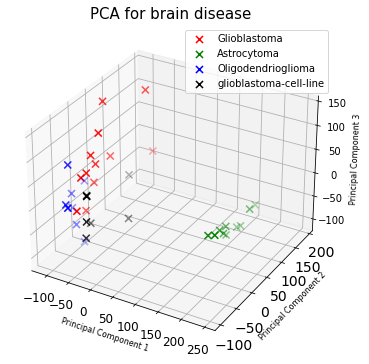

In [14]:

print(principal_gender_Df)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
targets2=['Glioblastoma','Astrocytoma','Oligodendrioglioma','glioblastoma-cell-line']
targets = [1, 2,3,4]
colors = ['r', 'g','blue','black']
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title('PCA for brain disease',fontsize=15)
ax.set_xlabel('Principal Component 1',fontsize=8)
ax.set_ylabel('Principal Component 2',fontsize=8)
ax.set_zlabel('Principal Component 3',fontsize=8)

for target, color in zip(targets,colors):
    indicesToKeep = y == target
    ax.scatter(principal_gender_Df.loc[indicesToKeep, 'principal component 1']
               , principal_gender_Df.loc[indicesToKeep, 'principal component 2']
               ,principal_gender_Df.loc[indicesToKeep, 'principal component 3'] ,marker='x', c=color, s=50)

plt.legend(targets2,prop={'size':10},loc=0)
plt.show()

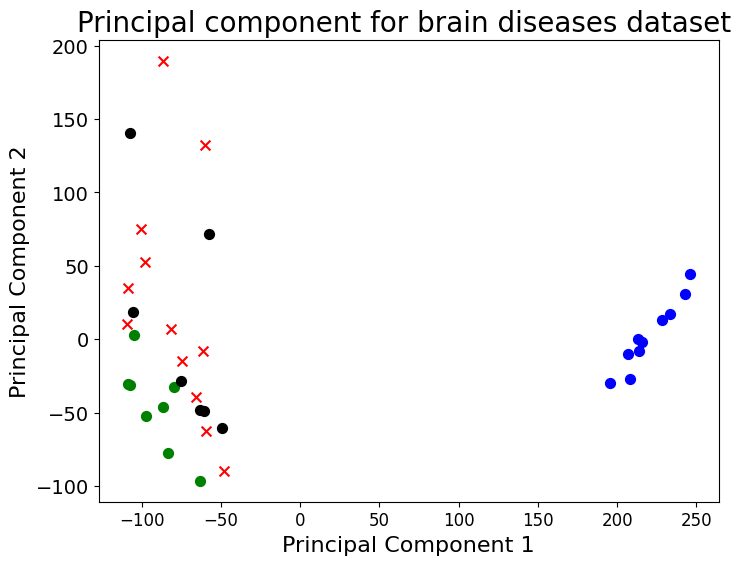

In [15]:
import matplotlib as mpl
from itertools import cycle
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib as mpl
import matplotlib.pyplot as plt
inline_rc = dict(mpl.rcParams)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
targets = [1, 0]
colors = ['r', 'blue']
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.title('Principal component for brain diseases dataset ',fontsize=20)
ax.set_xlabel('Principal Component 1',fontsize=16)
ax.set_ylabel('Principal Component 2',fontsize=16)
y2=list(y)
for i in range (len(y)):
    if y2[i]==1:
        ax.scatter(principal_gender_Df.iloc[i,0],principal_gender_Df.iloc[i,1] ,marker='x', c='r', s=50)
        
    if y2[i]==2:
        ax.scatter(principal_gender_Df.iloc[i,0],principal_gender_Df.iloc[i,1] ,marker='o', c='blue', s=50
                   )
    if y2[i]==3:
         ax.scatter(principal_gender_Df.iloc[i,0],principal_gender_Df.iloc[i,1] ,marker='o', c='green', s=50
                   )
    if y2[i]==4:
         ax.scatter(principal_gender_Df.iloc[i,0],principal_gender_Df.iloc[i,1] ,marker='o', c='black', s=50
                   )

plt.show()

    

In [16]:
from sklearn.preprocessing import label_binarize
Y = label_binarize(y, classes=[ 1, 2,3,4])
n_classes = Y.shape[1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_standardized, Y, test_size=0.5,shuffle=True, random_state=42)

In [18]:
len(y_test)#8
len(y_train)#29
print(y_test)

[[0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]]


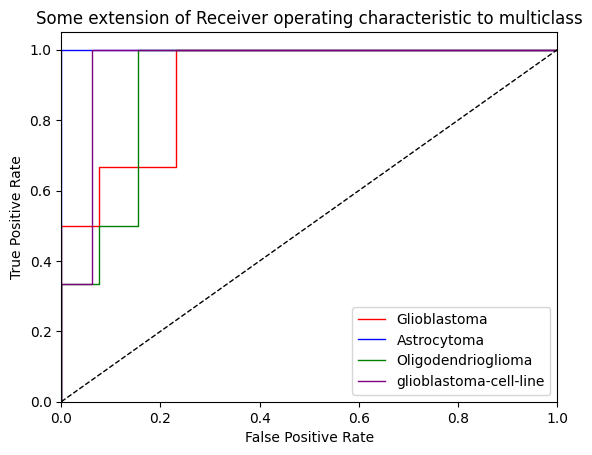

In [19]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
lw=1
classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none', 
                                    max_iter = 1000000))
)
classifier.fit(X_train,y_train)
y_score = classifier.decision_function(X_test)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])





colors = cycle(["red", "blue", "green","purple"])
lstx=[]
lsty=[]
for i, color in zip(range(n_classes), colors):
    lstx.append(fpr[i])
    lsty.append(tpr[i])
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
labels2=['Glioblastoma','Astrocytoma','Oligodendrioglioma','glioblastoma-cell-line']
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right",labels=labels2)
plt.show()

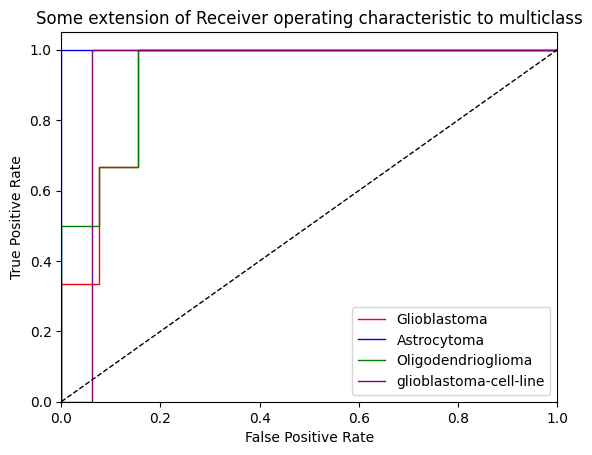

In [20]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
lw=1
classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0,
                                    max_iter = 1000000))
)
classifier.fit(X_train,y_train)
y_score = classifier.decision_function(X_test)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])





colors = cycle(["red", "blue", "green","purple"])
lstx2=[]
lsty2=[]
for i, color in zip(range(n_classes), colors):
    lstx2.append(fpr[i])
    lsty2.append(tpr[i])
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
labels2=['Glioblastoma','Astrocytoma','Oligodendrioglioma','glioblastoma-cell-line']
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right",labels=labels2)
plt.show()

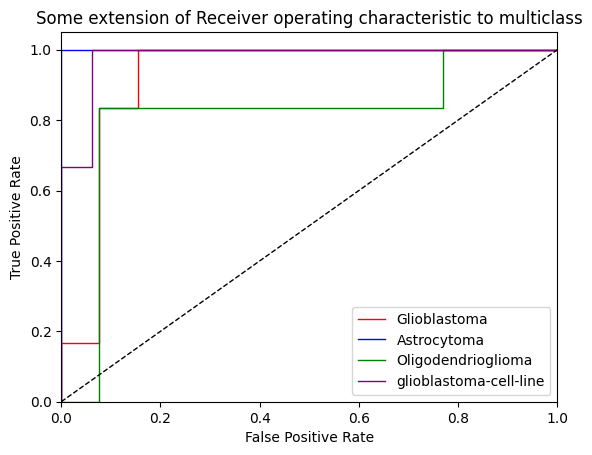

In [21]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
lw=1
classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', 
                                    max_iter = 1000000))
)
classifier.fit(X_train,y_train)
y_score = classifier.decision_function(X_test)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])





colors = cycle(["red", "blue", "green","purple"])
lstx3=[]
lsty3=[]
for i, color in zip(range(n_classes), colors):
    lstx3.append(fpr[i])
    lsty3.append(tpr[i])
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
labels2=['Glioblastoma','Astrocytoma','Oligodendrioglioma','glioblastoma-cell-line']
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right",labels=labels2)
plt.show()

In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
lw=1
classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='saga', penalty='elasticnet',C=1.0,l1_ratio=0.5, 
                                    max_iter = 1000000))
)
classifier.fit(X_train,y_train)
y_score = classifier.decision_function(X_test)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])





colors = cycle(["red", "blue", "green","purple"])
lstx4=[]
lsty4=[]
for i, color in zip(range(n_classes), colors):
    lstx4.append(fpr[i])
    lsty4.append(tpr[i])
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
labels2=['Glioblastoma','Astrocytoma','Oligodendrioglioma','glioblastoma-cell-line']
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right",labels=labels2)
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
lw=1
classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2',C=1.0,
                                    max_iter = 1000000))
)
classifier.fit(X_train,y_train)
y_score = classifier.decision_function(X_test)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])





colors = cycle(["red", "blue", "green","purple"])
lstx5=[]
lsty5=[]
for i, color in zip(range(n_classes), colors):
    lstx5.append(fpr[i])
    lsty5.append(tpr[i])
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
labels2=['Glioblastoma','Astrocytoma','Oligodendrioglioma','glioblastoma-cell-line']
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right",labels=labels2)
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
lw=1
classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1',C=1.0,
                                    max_iter = 1000000))
)
classifier.fit(X_train,y_train)
y_score = classifier.decision_function(X_test)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])





colors = cycle(["red", "blue", "green","purple"])
lstx6=[]
lsty6=[]
for i, color in zip(range(n_classes), colors):
    lstx6.append(fpr[i])
    lsty6.append(tpr[i])
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
labels2=['Glioblastoma','Astrocytoma','Oligodendrioglioma','glioblastoma-cell-line']
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right",labels=labels2)
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
lw=1
classifier = OneVsRestClassifier(
    make_pipeline(StandardScaler(), LogisticRegression(multi_class='multinomial', solver='saga', penalty='elasticnet',C=1.0,l1_ratio=0.5, 
                                    max_iter = 1000000))
)
classifier.fit(X_train,y_train)
y_score = classifier.decision_function(X_test)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])





colors = cycle(["red", "blue", "green","purple"])
lstx4=[]
lsty4=[]
for i, color in zip(range(n_classes), colors):
    lstx4.append(fpr[i])
    lsty4.append(tpr[i])
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
labels2=['Glioblastoma','Astrocytoma','Oligodendrioglioma','glioblastoma-cell-line']
plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right",labels=labels2)
plt.show()

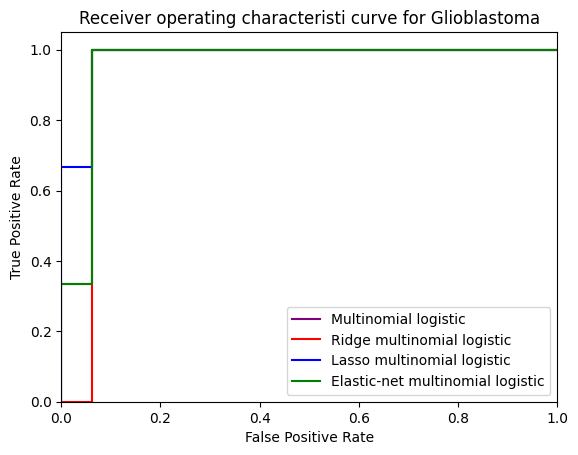

In [ ]:
plt.plot()

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(lstx[3],lsty[3],color='purple')
plt.plot(lstx2[3],lsty2[3],color='red')
plt.plot(lstx3[3],lsty3[3],color='blue')
plt.plot(lstx4[3],lsty4[3],color='green')
labels2=['Multinomial logistic','Ridge multinomial logistic','Lasso multinomial logistic','Elastic-net multinomial logistic']
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver operating characteristi curve for Glioblastoma')
plt.legend(loc="lower right",labels=labels2)
plt.show()

In [13]:
from sklearn.metrics import classification_report
Classification = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none', 
                           C=1.0, max_iter = 1000000)

Classification2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', 
                           C=1.0, max_iter = 1000000)

Classification3 = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', 
                           C=1.0, max_iter = 1000000)

Classification4 = LogisticRegression(multi_class='multinomial', solver='saga', penalty='elasticnet',l1_ratio=0.5, 
                           C=1.0, max_iter = 1000000)
X_train, X_test, y_train, y_test = train_test_split(x_standardized, y2, test_size=0.5,shuffle=True, random_state=42)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#penalty parameter choice 
penalty=[1*i for i in range(1,10001)]
classifier=['l1']
solver=['saga']
l1_ratio=[i*0.01 for i in range(1,100)]

#create the grid
grid={'penalty':classifier,'C':penalty,'solver':solver}
#set up algorithm

randomsearch=RandomizedSearchCV(estimator=Classification3,param_distributions=grid,
                                cv=3,verbose=2,n_jobs=10,n_iter=200,
                                scoring='accuracy',return_train_score=True)
#train 

randomsearch.fit(x_standardized,y2)

#ridge :::: 3.1

print('The best parameters set for random search is: {}'.format(randomsearch.best_params_))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


KeyboardInterrupt: 

In [ ]:
# define the multinomial logistic regression model with a default penalty
from sklearn.metrics import classification_report
Classification = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none', 
                            max_iter = 1000000)

Classification.fit(X_train,y_train)

#Evaluation 
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve,plot_precision_recall_curve,plot_confusion_matrix

TestProbability=Classification.predict_proba(X_test)[:,1] #probability estimates 
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1.
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.
TestPred=Classification.predict(X_test)
print(TestPred)
print(list(y_test))
print(classification_report(y_test, TestPred))
from sklearn.metrics import confusion_matrix
f=f1_score(y_test, TestPred, average='micro')
cm = confusion_matrix(y_test, TestPred)
print(accuracy_score(y_test, TestPred))
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print(np.mean(recall))
print(precision)
print(f)

[4 1 1 2 2 4 1 1 4 4 1 1 1 2 1 4 1 2 1]
[3, 3, 1, 2, 2, 4, 1, 4, 4, 3, 1, 3, 3, 2, 1, 3, 1, 2, 1]
              precision    recall  f1-score   support

           1       0.60      1.00      0.75         6
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         6
           4       0.40      0.67      0.50         3

    accuracy                           0.63        19
   macro avg       0.50      0.67      0.56        19
weighted avg       0.46      0.63      0.53        19

0.631578947368421
0.6666666666666666
[0.6 1.  nan 0.4]
0.631578947368421


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [ ]:
print(accuracy_score(y_test, TestPred))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [55]:
# define the multinomial logistic regression model with a default penalty
from sklearn.metrics import classification_report
Classification = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', 
                           C=78912, max_iter = 1000000)

Classification.fit(X_train,y_train)

#Evaluation 
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve,plot_precision_recall_curve,plot_confusion_matrix

TestProbability=Classification.predict_proba(X_test)[:,1] #probability estimates 
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1.
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.
TestPred=Classification.predict(X_test)
print(TestPred)
print(list(y_test))
print(classification_report(y_test, TestPred))
from sklearn.metrics import confusion_matrix
f=f1_score(y_test, TestPred, average='micro')
cm = confusion_matrix(y_test, TestPred)
print(accuracy_score(y_test, TestPred))
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print(np.mean(recall))
print(np.mean(precision))
print(f)

[4 1 1 2 2 4 1 1 4 4 1 1 1 2 1 4 1 2 1]
[3, 3, 1, 2, 2, 4, 1, 4, 4, 3, 1, 3, 3, 2, 1, 3, 1, 2, 1]
              precision    recall  f1-score   support

           1       0.60      1.00      0.75         6
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         6
           4       0.40      0.67      0.50         3

    accuracy                           0.63        19
   macro avg       0.50      0.67      0.56        19
weighted avg       0.46      0.63      0.53        19

0.631578947368421
0.6666666666666666
nan
0.631578947368421


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [49]:
# define the multinomial logistic regression model with a default penalty
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report
Classification = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', 
                           C=100983, max_iter = 1000000)

Classification.fit(X_train,y_train)

#Evaluation 
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve,plot_precision_recall_curve,plot_confusion_matrix

TestProbability=Classification.predict_proba(X_test)[:,1] #probability estimates 
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1.
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.
TestPred=Classification.predict(X_test)
print(TestPred)
print(list(y_test))
print(classification_report(y_test, TestPred))
from sklearn.metrics import confusion_matrix
f=f1_score(y_test, TestPred, average='micro')
cm = confusion_matrix(y_test, TestPred)
print(accuracy_score(y_test, TestPred))
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print(np.mean(recall))
print(np.mean(precision))
print(f)

[4 3 1 2 2 4 1 4 4 3 1 1 3 2 1 4 1 2 3]
[3, 3, 1, 2, 2, 4, 1, 4, 4, 3, 1, 3, 3, 2, 1, 3, 1, 2, 1]
              precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           2       1.00      1.00      1.00         4
           3       0.75      0.50      0.60         6
           4       0.60      1.00      0.75         3

    accuracy                           0.79        19
   macro avg       0.80      0.83      0.80        19
weighted avg       0.81      0.79      0.78        19

0.7894736842105263
0.8333333333333334
0.7958333333333334
0.7894736842105263


In [ ]:
print(accuracy_score(y_test, TestPred))

0.7368421052631579


In [60]:
# define the multinomial logistic regression model with a default penalty
from sklearn.metrics import classification_report
Classification = LogisticRegression(multi_class='multinomial', solver='saga', penalty='elasticnet',l1_ratio=0.85, 
                           C=897040, max_iter = 1000000)

Classification.fit(X_train,y_train)

#Evaluation 
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve,plot_precision_recall_curve,plot_confusion_matrix

TestProbability=Classification.predict_proba(X_test)[:,1] #probability estimates 
#The function predict_proba() returns a numpy array of two columns. 
#The first column is the probability that target=0 and the second column is the probability that target=1.
# That is why we add [:,1] after predict_proba() in order to get the probabilities of target=1.
TestPred=Classification.predict(X_test)
print(TestPred)
print(list(y_test))
print(classification_report(y_test, TestPred))
from sklearn.metrics import confusion_matrix
f=f1_score(y_test, TestPred, average='micro')
cm = confusion_matrix(y_test, TestPred)
print(accuracy_score(y_test, TestPred))
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print(np.mean(recall))
print(np.mean(precision))
print(f)

[4 3 1 2 2 4 1 4 4 3 1 1 3 2 1 4 1 2 3]
[3, 3, 1, 2, 2, 4, 1, 4, 4, 3, 1, 3, 3, 2, 1, 3, 1, 2, 1]
              precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           2       1.00      1.00      1.00         4
           3       0.75      0.50      0.60         6
           4       0.60      1.00      0.75         3

    accuracy                           0.79        19
   macro avg       0.80      0.83      0.80        19
weighted avg       0.81      0.79      0.78        19

0.7894736842105263
0.8333333333333334
0.7958333333333334
0.7894736842105263


In [68]:
print(Classification.coef_[0])
count=0
for i in range(54675):
    if Classification.coef_[0][i]==0.0:
        count=count+1
    else:
        count=count-1
print(count)

[ 2.13561761e-04  4.46362393e-05  3.03400470e-04 ...  6.75945953e-04
 -2.68356491e-04 -4.01876318e-04]
-54675


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(4):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], TestPred[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], TestPred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test.ravel(), TestPred.ravel()
)
average_precision["micro"] = average_precision_score(y_test, TestPred, average="micro")

KeyError: 'key of type tuple not found and not a MultiIndex'

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

NameError: name 'recall' is not defined

In [ ]:
print(np.shape(Classification.coef_))

(4, 54675)
